In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from scipy.stats import boxcox
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.manifold import LocallyLinearEmbedding
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch.cuda as cuda
if cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU доступен")
else:
    device = torch.device("cpu")
    print("GPU не доступен")

GPU доступен


In [ ]:
# загружаем данные из тренировочного, тестового файлов и примера submission
cardio_train_data = pd.read_csv('/content/gdrive/MyDrive/date_1/train.csv', header=0)
cardio_test_data = pd.read_csv('/content/gdrive/MyDrive/date_1/test.csv', header=0)
cardio_submiss = pd.read_csv('/content/gdrive/MyDrive/date_1/sample_submission.csv', header=0)

# удаляем ID, визуализируем train
cardio_train_data = cardio_train_data.drop(['ID'], axis=1)
cardio_test_data = cardio_test_data.drop(['ID'], axis=1)
cardio_train_data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [ ]:
cardio_test_data.head() #визуализируем тестовый файл

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [ ]:
cardio_submiss.head(3) #визулизируем пример submission

,ID,class
0,600000,0
1,600001,0
2,600002,0


In [ ]:
cardio_train_data.info()  # имеются данные с плавающей и int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  float64
 1   sex                                   600000 non-null  int64  
 2   chest                                 600000 non-null  float64
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  int64  
 6   resting_electrocardiographic_results  600000 non-null  int64  
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  int64  
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  int64  
 11  

In [ ]:
cardio_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   400000 non-null  float64
 1   sex                                   400000 non-null  int64  
 2   chest                                 400000 non-null  float64
 3   resting_blood_pressure                400000 non-null  float64
 4   serum_cholestoral                     400000 non-null  float64
 5   fasting_blood_sugar                   400000 non-null  int64  
 6   resting_electrocardiographic_results  400000 non-null  int64  
 7   maximum_heart_rate_achieved           400000 non-null  float64
 8   exercise_induced_angina               400000 non-null  int64  
 9   oldpeak                               400000 non-null  float64
 10  slope                                 400000 non-null  int64  
 11  

In [ ]:
print ("Duplicate values in df are:" , cardio_train_data.duplicated().sum()) # проверяем дупликаты -дупликатов нет

Duplicate values in df are: 0


In [ ]:
# смотрим уникальные значения, отсутвующие значения и их процент, столбцы с 0 значением и тип данных с столбцах
def highlight_missing(value):
    if value == "nan" or value == 0:
        return f"\033[91m{value}\033[0m"
    else:
        return str(value)

def get_feature_type(col):
    if cardio_train_data[col].dtype == 'object':
        return "Categorical"
    else:
        return "Numerical"

print(tabulate([
    [col, highlight_missing(cardio_train_data[col].nunique()), highlight_missing((cardio_train_data[col] == 0).sum()), highlight_missing(cardio_train_data[col].isnull().sum()), f"{(cardio_train_data[col].isnull().sum() / len(cardio_train_data)) * 100:.1f}%", get_feature_type(col)]
    for col in cardio_train_data.columns
], headers=["features", "unique value", "Values zero", "Missing_Number", "Missing_Percent", "features type"], tablefmt="fancy_grid"))


╒══════════════════════════════════════╤════════════════╤═══════════════╤══════════════════╤═══════════════════╤═════════════════╕
│ features                             │   unique value │   Values zero │   Missing_Number │ Missing_Percent   │ features type   │
╞══════════════════════════════════════╪════════════════╪═══════════════╪══════════════════╪═══════════════════╪═════════════════╡
│ age                                  │         594106 │             0 │                0 │ 0.0%              │ Numerical       │
├──────────────────────────────────────┼────────────────┼───────────────┼──────────────────┼───────────────────┼─────────────────┤
│ sex                                  │              2 │        193532 │                0 │ 0.0%              │ Numerical       │
├──────────────────────────────────────┼────────────────┼───────────────┼──────────────────┼───────────────────┼─────────────────┤
│ chest                                │         133009 │             0 │          

In [ ]:
cardio_train_data.describe().T.style.format(precision=3).background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='RdPu')# выводим статистику для общего понимания

,count,mean,std,min,25%,50%,75%,max
age,600000.000,54.426,9.086,26.062,48.078,55.133,60.664,79.592
sex,600000.000,0.677,0.467,0.000,0.000,1.000,1.000,1.000
chest,600000.000,3.170,0.950,-0.538,3.000,3.000,4.000,4.000
resting_blood_pressure,600000.000,131.340,17.842,82.919,119.924,129.728,139.915,209.674
serum_cholestoral,600000.000,249.592,51.700,98.326,216.476,244.234,274.345,527.756
fasting_blood_sugar,600000.000,0.151,0.358,0.000,0.000,0.000,0.000,1.000
resting_electrocardiographic_results,600000.000,1.020,0.994,0.000,0.000,2.000,2.000,2.000
maximum_heart_rate_achieved,600000.000,149.592,23.073,61.844,135.704,153.225,165.165,208.735
exercise_induced_angina,600000.000,0.334,0.471,0.000,0.000,0.000,1.000,1.000
oldpeak,600000.000,1.051,1.144,-0.807,0.000,0.811,1.674,6.803


In [ ]:
# Смотрим составляющие таргета, который представлен 0 и 1, следовательно имеем дело с проблемами классификации
cardio_train_data['class'].unique()

array([1, 0])

In [ ]:
# Смотрим корреляцию признаков с таргетом
# Вывод показывает, что столбцы 'thal', number_of_major_vessels, chest и имеют наибольшую корреляцию со столбцом 'class',
#	serum_cholestoral: Корреляция 0.117765 - очень слабо положительно коррелирует со столбцом 'class'.
# resting_blood_pressure: Корреляция 0.115044 - очень слабо положительно коррелирует со столбцом 'class'.
# fasting_blood_sugar: Корреляция 0.015911 - очень слабо положительно коррелирует со столбцом'class'.
print(cardio_train_data.corr()['class'].abs().sort_values(ascending=False))

class                                   1.000000
thal                                    0.516555
number_of_major_vessels                 0.447143
chest                                   0.419546
exercise_induced_angina                 0.411014
oldpeak                                 0.392788
maximum_heart_rate_achieved             0.368760
slope                                   0.316084
sex                                     0.292998
age                                     0.222008
resting_electrocardiographic_results    0.180097
serum_cholestoral                       0.117765
resting_blood_pressure                  0.115044
fasting_blood_sugar                     0.015911
Name: class, dtype: float64


In [ ]:
# Рассчитываем матрицу корреляций
corr_matrix = cardio_train_data.corr()
# Рассчитываем ранг матрицы корреляций
rank = np.linalg.matrix_rank(corr_matrix)
# Рассчитываем определитель матрицы корреляций
det = np.linalg.det(corr_matrix)
print(f"Ранг матрицы корреляций: {rank}")
print(f"Определитель матрицы корреляций: {det:.3f}")

# Ранг матрицы корреляций - 14, что указывает на то, что матрица имеет полный ранг и между признаками нет линейных зависимостей.
#  Определитель матрицы корреляций - 0,141, признаки не имеют высокой корреляции между собой.

Ранг матрицы корреляций: 14
Определитель матрицы корреляций: 0.141


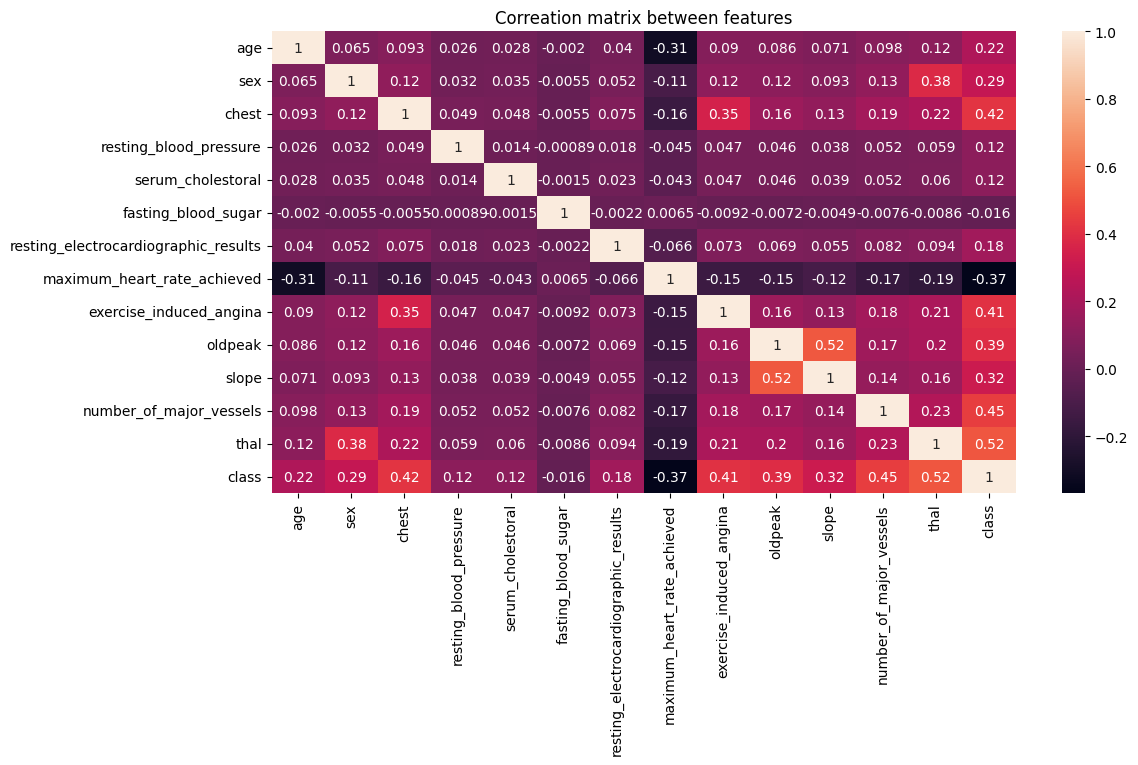

In [ ]:
plt.figure(figsize = (12,6))
cm = cardio_train_data.corr()
sns.heatmap(cm, annot = True)
plt.title('Correation matrix between features') # смотрим матрицу корреляций
plt.show()
# большинство переменных имеют слабую или умеренную корреляцию между собой, то есть что переменные относительно независимы и не имеют сильной взаимосвязи.
# age и maximum_heart_rate_achieved имеют умеренную отрицательную корреляцию (-0,305867),  с возрастом максимальный сердечный ритм уменьшается.
# chest и exercise_induced_angina имеют умеренную положительную корреляцию (0,350996), , что боль в груди связана с вероятностью возникновения стенокардии при физической нагрузке.
# thal и class имеют положительную корреляцию (0,516555), степень дефекта связана с целевой переменной.
# slope и oldpeak имеют  положительную корреляцию (0,522338), депрессия пиковое значение зубца ST связаны между собой.

class
0    333489
1    266511
Name: count, dtype: int64


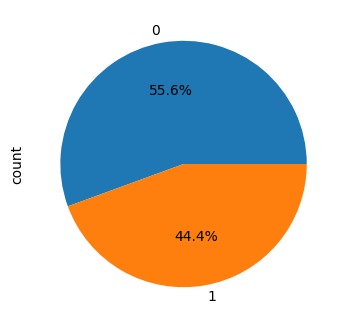

In [ ]:
# в представленных данных 55,6% (333 489) пациентов не имеют заболевения сердца, 44,4% (266 511) больны.
print(cardio_train_data['class'].value_counts())
cardio_train_data['class'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(4,4));

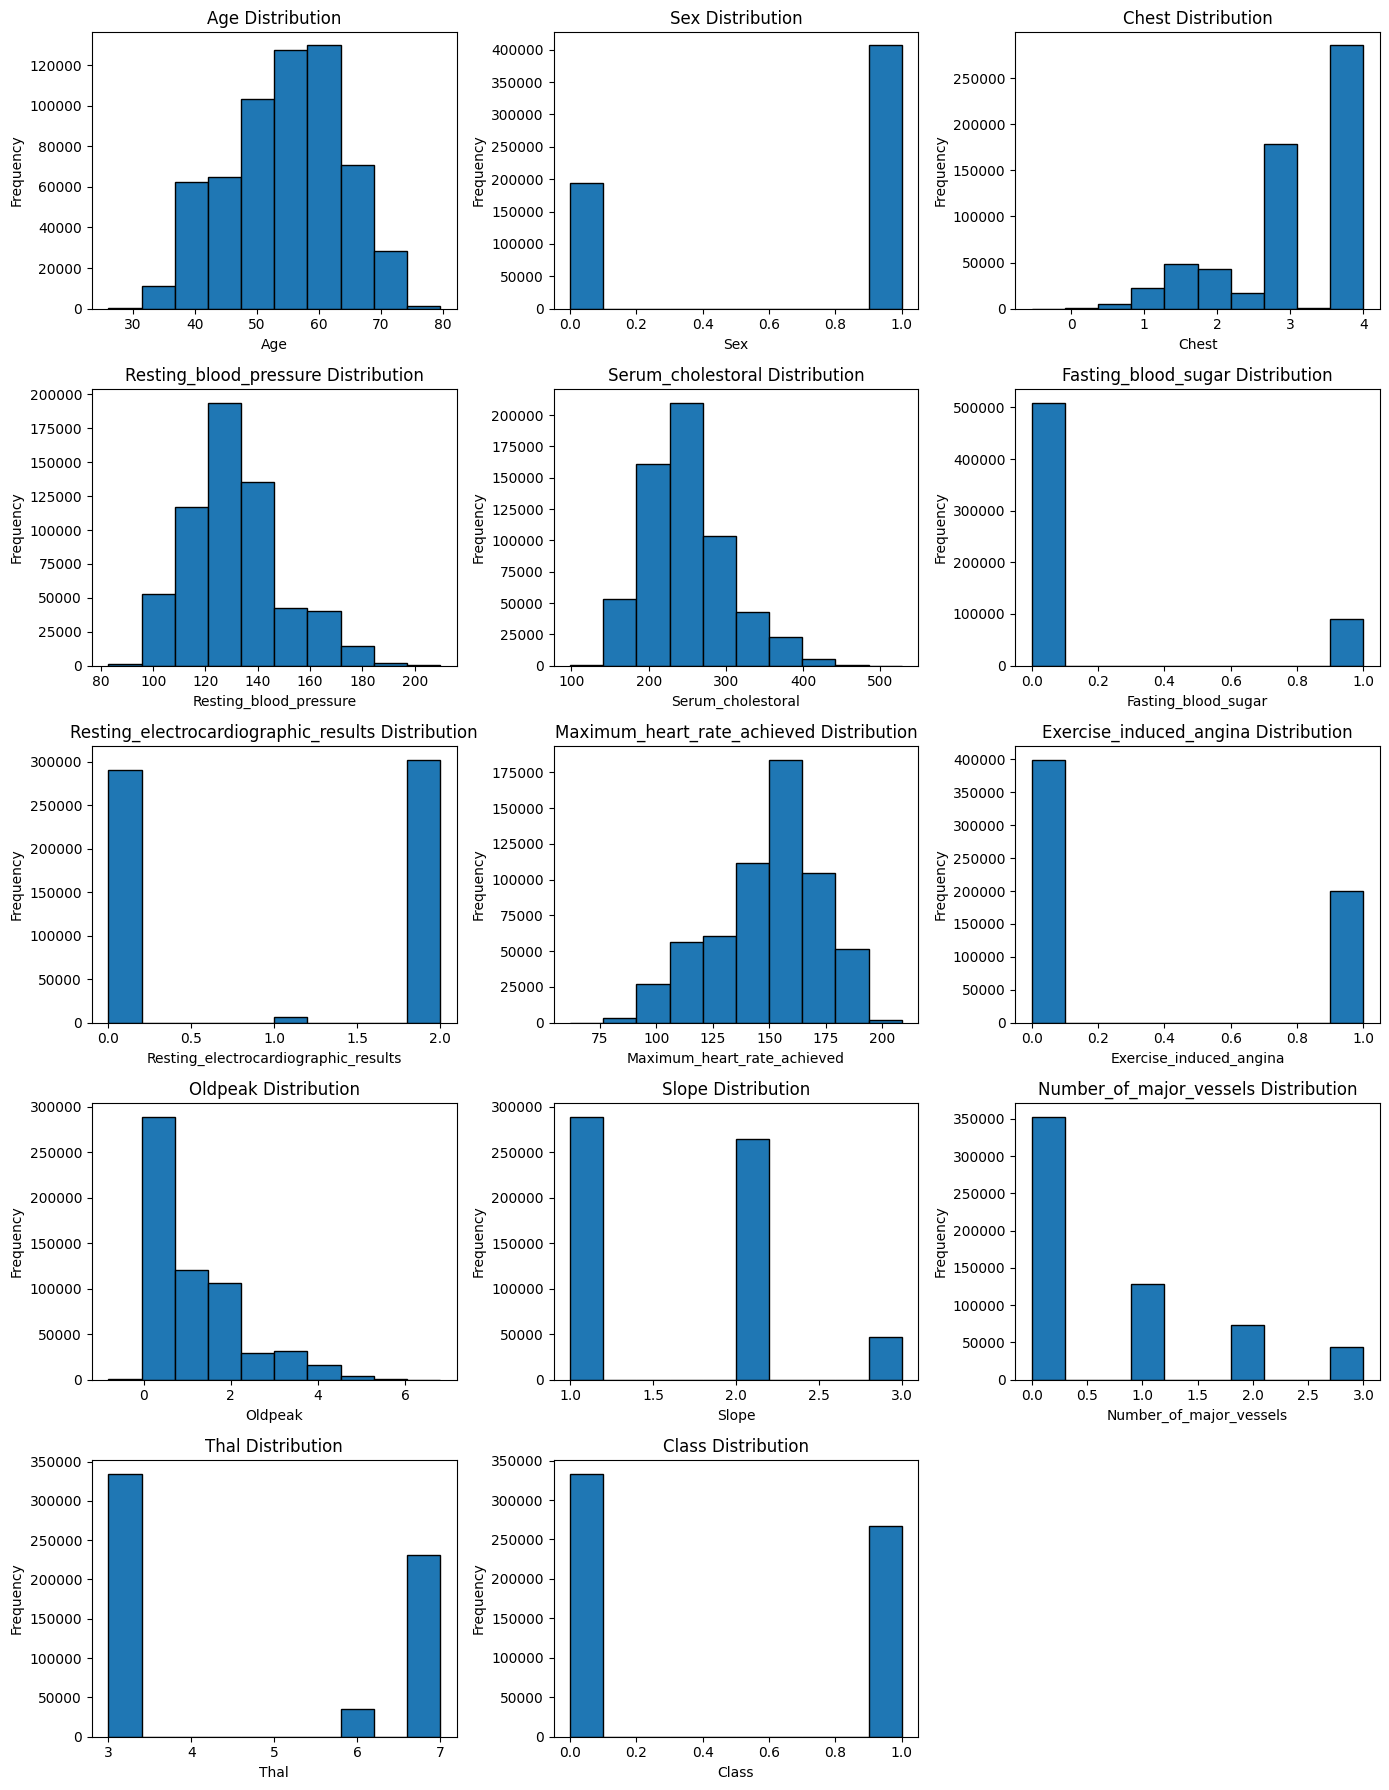

In [ ]:
# Смотрим составляющие признаков на гистограммах
variables = ['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
             'fasting_blood_sugar', 'resting_electrocardiographic_results',
             'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
             'slope', 'number_of_major_vessels', 'thal', 'class']
# Calculate the number of columns and rows for the subplots
n_cols = 3
n_rows = (len(variables) + n_cols - 1) // n_cols
# Create a figure with subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 18))
# Loop through each variable and create a histogram
for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].hist(cardio_train_data[var], bins=10, edgecolor='black')
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Frequency')
# Remove any empty subplots
for i in range(len(variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].axis('off')
# Show the plot
plt.tight_layout()
plt.show()

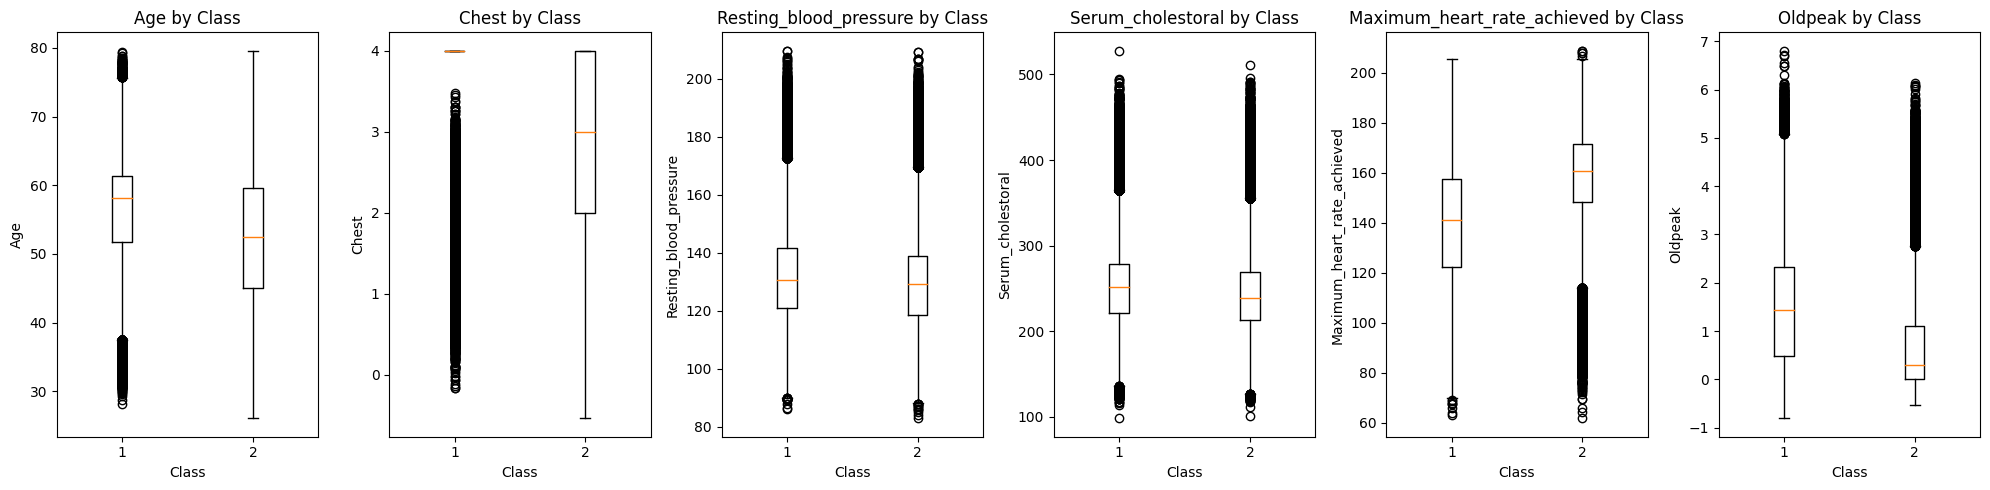

In [ ]:
# таким образом мы имеем  6 признаков "истинно" числовых:  age, chest, resting_blood_pressure, serum_cholestoral, maximum_heart_rate_achieved и oldpeak
#                           3 признака бинарны,такие как:  sex, fasting_blood_sugar, exercise_induced_angina
#                3 признака имеют три возможных градации:  resting_electrocardiographic_results, thal и slope
#                                один признак 4 градации:  number_of_major_vessels
# смотрим boxplot "истинно" числовых
features = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
            'maximum_heart_rate_achieved', 'oldpeak']
fig, axs = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))

for i, feature in enumerate(features):
    axs[i].boxplot([cardio_train_data[cardio_train_data['class'] == c][feature]
                    for c in cardio_train_data['class'].unique()])
    axs[i].set_title(f'{feature.capitalize()} by Class')
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

In [ ]:
# # Здесь мы определяем три списка признаков:  to_be_scaled_feat - признаки, которые будем масштабировать и убирать выбросы,
# #                                            transfer_feat  -  признаки которые будем переводить в фиктивные
#                                              other_feat -      признаки, которые не требуют масштабирования и перевода, так как они уже бинарны.

In [ ]:
# Define the features to be scaled, transferred, and others
to_be_scaled_feat = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']
transfer_feat = ['resting_electrocardiographic_results', 'thal', 'slope', 'number_of_major_vessels']
other_feat = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']

In [ ]:
# будем применять преобразование Бокса-Кокса (Box-Cox transformation), который является одним из методом пробразования данных для достижения нормальности распределения,
# стабилизации дисперсии и улучшения линейных отношений.
# Так как в данных имеются отрицательные и нулевые значения сдвигаем данные, добавив константу, чтобы все значения стали положительными.

In [ ]:
# 2. Проверяем наличие нулей или отрицательных значений и сдвигаем данные
for feature in to_be_scaled_feat:
    if (cardio_train_data[feature] <= 0).any():
        min_value = cardio_train_data[feature].min()
        cardio_train_data[feature] = cardio_train_data[feature] + 1 - min_value
# # Убедитесь, что все значения положительные
# print(cardio_train_data)

In [ ]:
# 3. Применяем преобразование Бокса-Кокса (Box-Cox transformation)
for feature in to_be_scaled_feat:
    # Проверяем, что все значения положительные перед применением Box-Cox
    if (cardio_train_data[feature] <= 0).any():
        raise ValueError(f"Feature '{feature}' contains non-positive values. Box-Cox transformation requires positive values.")

    cardio_train_data[feature], _ = boxcox(cardio_train_data[feature])

In [ ]:
# 4. Удаление выбросов
for feature in to_be_scaled_feat:
    z_scores = zscore(cardio_train_data[feature])
    cardio_train_data = cardio_train_data[np.abs(z_scores) < 3]

In [ ]:
# 5. One-hot encoding для transfer_feat
transfer_feat = ['resting_electrocardiographic_results', 'thal', 'slope', 'number_of_major_vessels']
cardio_train_data = pd.get_dummies(cardio_train_data, columns=transfer_feat)
# print(cardio_train_data)

In [ ]:
# 6. Разделение данных на обучающий и валидационный наборы со стратификацией по таргету
X = cardio_train_data.drop(columns=['class'])
y = cardio_train_data['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# 7. Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# 8. Снижение размерности LLE
lle = LocallyLinearEmbedding(n_components=7)
X_train_lle = lle.fit_transform(X_train_scaled)
X_val_lle = lle.transform(X_val_scaled)

In [ ]:
# 9. Обучение Logistic Regression
log_reg = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear')
log_reg.fit(X_train_lle, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
# 10. Обучение RandomForest
rf_model = RandomForestClassifier(max_depth=20, n_estimators=200)
rf_model.fit(X_train_lle, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
# # 11. Обучение Neural Network (MLP)
# # Определение модели MLP
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Добавляем выходной слой
        self.relu4 = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# # Сброс состояния модели и оптимизатора
mlp_model = MLP(input_size=X_train_lle.shape[1])
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Подготовка данных для нейронной сети
X_train_tensor = torch.FloatTensor(X_train_lle)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)

# Обучение модели
mlp_model = MLP(input_size=X_train_lle.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

for epoch in range(100):  # Число эпох
    optimizer.zero_grad()
# Обнуляем градиенты
    outputs = mlp_model(X_train_tensor)  # Прямой проход
    loss = criterion(outputs, y_train_tensor)  # Вычисляем потерю
    loss.backward()  # Обратный проход
    optimizer.step()  # Обновляем параметры модели # Печать номера эпохи и потерь
    print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.6951
Epoch [2/100], Loss: 0.6943
Epoch [3/100], Loss: 0.6935
Epoch [4/100], Loss: 0.6928
Epoch [5/100], Loss: 0.6921
Epoch [6/100], Loss: 0.6916
Epoch [7/100], Loss: 0.6910
Epoch [8/100], Loss: 0.6905
Epoch [9/100], Loss: 0.6900
Epoch [10/100], Loss: 0.6896
Epoch [11/100], Loss: 0.6891
Epoch [12/100], Loss: 0.6887
Epoch [13/100], Loss: 0.6884
Epoch [14/100], Loss: 0.6881
Epoch [15/100], Loss: 0.6878
Epoch [16/100], Loss: 0.6876
Epoch [17/100], Loss: 0.6874
Epoch [18/100], Loss: 0.6872
Epoch [19/100], Loss: 0.6871
Epoch [20/100], Loss: 0.6870
Epoch [21/100], Loss: 0.6869
Epoch [22/100], Loss: 0.6869
Epoch [23/100], Loss: 0.6869
Epoch [24/100], Loss: 0.6869
Epoch [25/100], Loss: 0.6870
Epoch [26/100], Loss: 0.6870
Epoch [27/100], Loss: 0.6870
Epoch [28/100], Loss: 0.6871
Epoch [29/100], Loss: 0.6871
Epoch [30/100], Loss: 0.6871
Epoch [31/100], Loss: 0.6871
Epoch [32/100], Loss: 0.6871
Epoch [33/100], Loss: 0.6871
Epoch [34/100], Loss: 0.6871
Epoch [35/100], Loss: 0

Model: Logistic Regression
Accuracy: 0.5778
              precision    recall  f1-score   support

           0       0.57      0.99      0.72     66612
           1       0.86      0.06      0.11     53246

    accuracy                           0.58    119858
   macro avg       0.71      0.53      0.42    119858
weighted avg       0.70      0.58      0.45    119858

[[66078   534]
 [50072  3174]]
Model: Random Forest
Accuracy: 0.7032
              precision    recall  f1-score   support

           0       0.68      0.90      0.77     66612
           1       0.78      0.46      0.58     53246

    accuracy                           0.70    119858
   macro avg       0.73      0.68      0.68    119858
weighted avg       0.72      0.70      0.69    119858

[[59668  6944]
 [28634 24612]]
Model: Neural Network
Accuracy: 0.5558
              precision    recall  f1-score   support

           0       0.56      1.00      0.71     66612
           1       0.00      0.00      0.00     53246


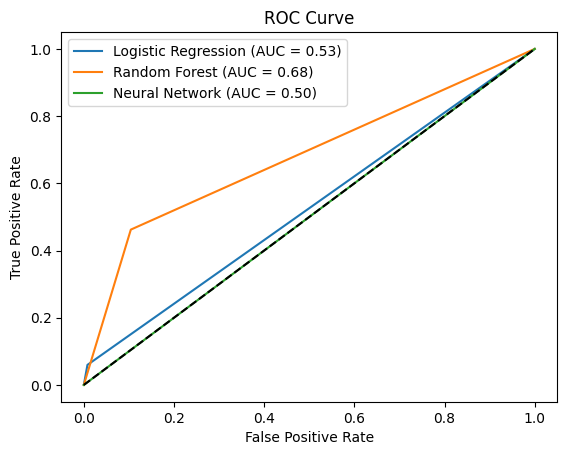

In [ ]:
# 12. Сравнение моделей
models = {'Logistic Regression': log_reg, 'Random Forest': rf_model, 'Neural Network': mlp_model}
for name, model in models.items():
    if name == 'Neural Network':
        with torch.no_grad():
            y_val_tensor = torch.FloatTensor(X_val_lle)
            y_pred = (mlp_model(y_val_tensor) > 0.5).numpy()
    else:
        y_pred = model.predict(X_val_lle)

    # Вычисление точности
    accuracy = accuracy_score(y_val, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")  # Вывод точности
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# на графике также видим, что Random Forest с небольшим перевесом, но лучше Logistic Regression и Neural Network,
# accuracy  не высокий, имеет смысл приготовить данные по другому

In [ ]:
# 13. Сохранение весов RandomForest
import joblib
joblib.dump(rf_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
# 14. Скрипт для инференса
def infer(model, scaler, lle, cardio_test_data, to_be_scaled_feat, transfer_feat):
    # Обработка данных перед инференсом
    for feature in to_be_scaled_feat:
        if (cardio_test_data[feature] <= 0).any():
            min_value = cardio_test_data[feature].min()
            cardio_test_data[feature] = cardio_test_data[feature] + 1 - min_value

    # Проверяем, что все значения положительные перед применением Box-Cox
    for feature in to_be_scaled_feat:
        if (cardio_test_data[feature] <= 0).any():
            raise ValueError(f"Feature '{feature}' contains non-positive values. Box-Cox transformation requires positive values.")

        # Применение Box-Cox трансформации
        cardio_test_data[feature], _ = boxcox(cardio_test_data[feature])

    # Преобразование категориальных признаков в дамми-переменные
    cardio_test_data = pd.get_dummies(cardio_test_data, columns=transfer_feat)
 # Удаляем ID и подготавливаем данные для предсказания
    X_test = cardio_test_data.drop(columns=['ID'])
    X_test_scaled = scaler.transform(X_test)
    X_test_lle = lle.transform(X_test_scaled)

    return model.predict(X_test_lle)

In [ ]:
# 15. Результат на тестовом файле
# Создаем новый столбец ID
cardio_test_data['ID'] = range(1, len(cardio_test_data) + 1)  # ID от 1 до n

# Теперь создаем cardio_submission
cardio_submission = cardio_test_data[['ID']].copy()
cardio_submission['class'] = infer(rf_model, scaler, lle, cardio_test_data, to_be_scaled_feat, transfer_feat)

# Сохраняем результаты в CSV файл
cardio_submission.to_csv('submission.csv', index=False)